# Stroke prediction: (EDA) & Modeling

## 1️⃣ Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
warnings.filterwarnings("ignore")

## 2️⃣ Loading the Dataset

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 3️⃣ Understanding the Dataset Structure
Let's check the number of rows and columns and get a summary of the dataset.

In [3]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 5110 rows and 12 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 4️⃣ Checking for Missing and Duplicate Values

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Values (%):\n", missing_percentage)

Missing Values (%):
 id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [8]:
df.duplicated().sum()

np.int64(0)

## 5️⃣ Analyzing Numerical Data Distribution
We will analyze the distribution of numerical variables using histograms.  
Histograms help us understand the spread of numerical data, detect skewness, and identify potential outliers.
A Kernel Density Estimate (KDE) line will be added to show the probability distribution of the data.

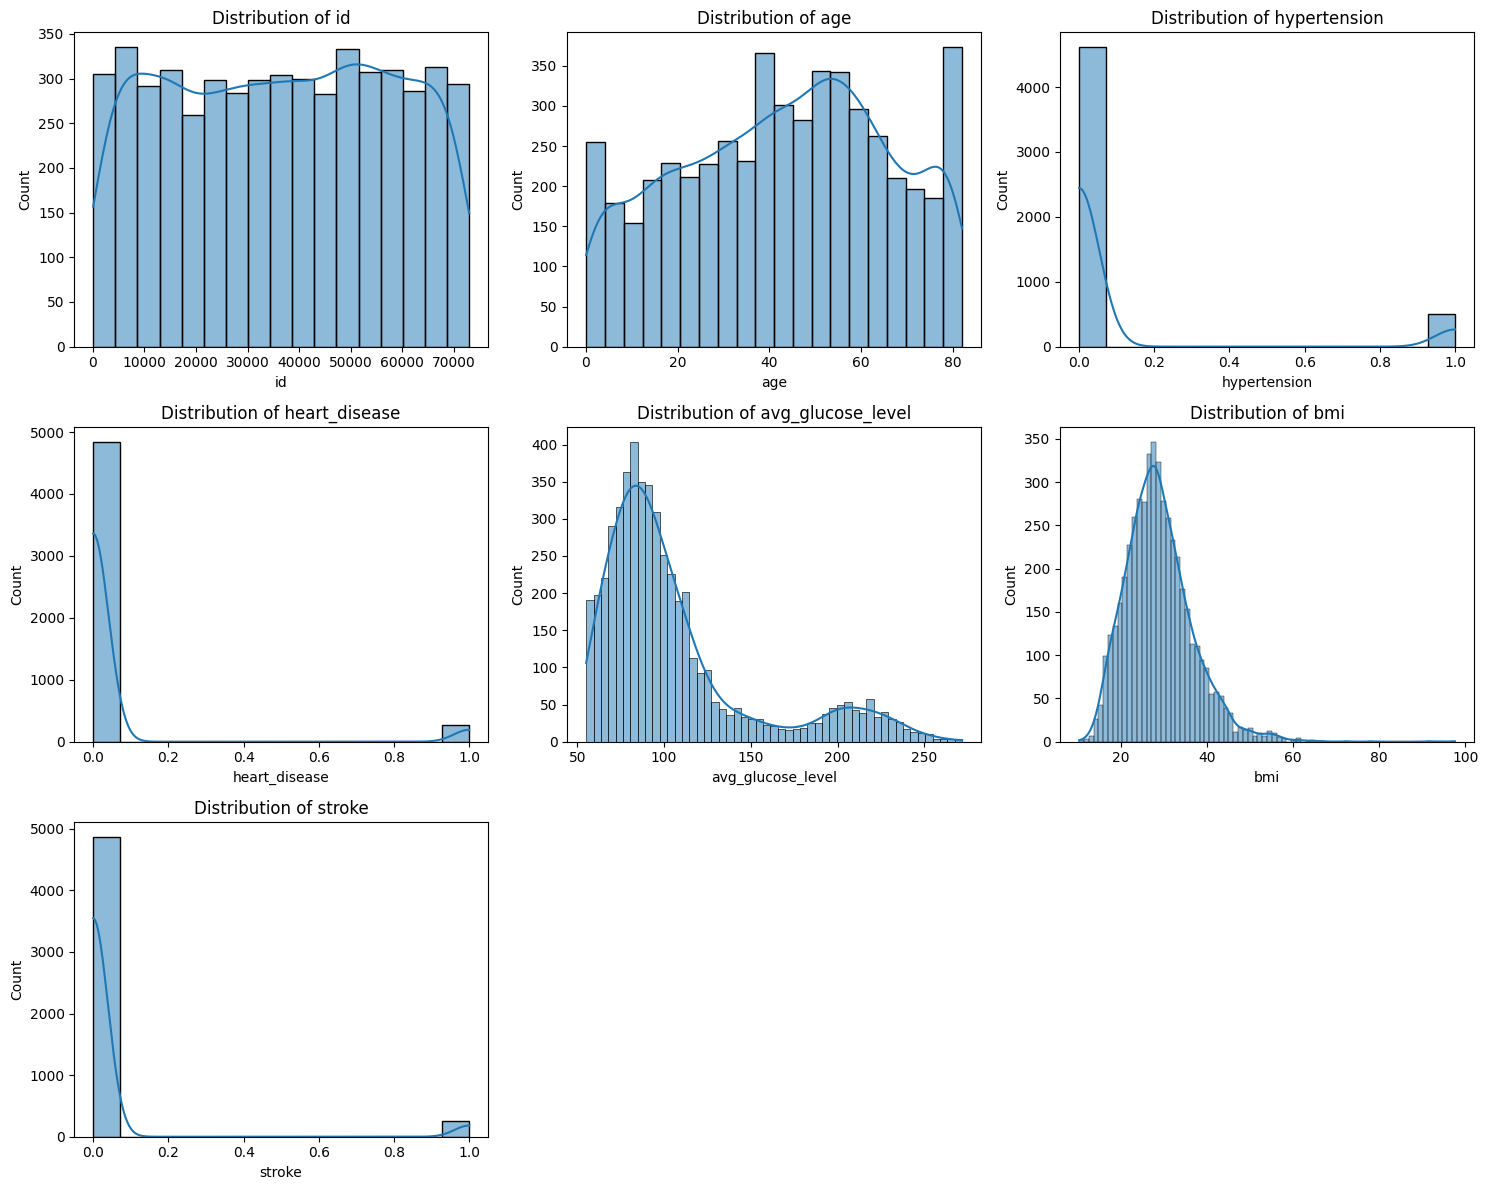

In [9]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))
# Loop through numerical columns and plot histograms
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")  # Add a title to each plot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## 6️⃣ Analyzing Categorical Data Distribution
We will analyze the distribution of categorical variables using bar charts.  
Categorical variables represent different groups or categories, so we will visualize their frequencies to understand how data is distributed.

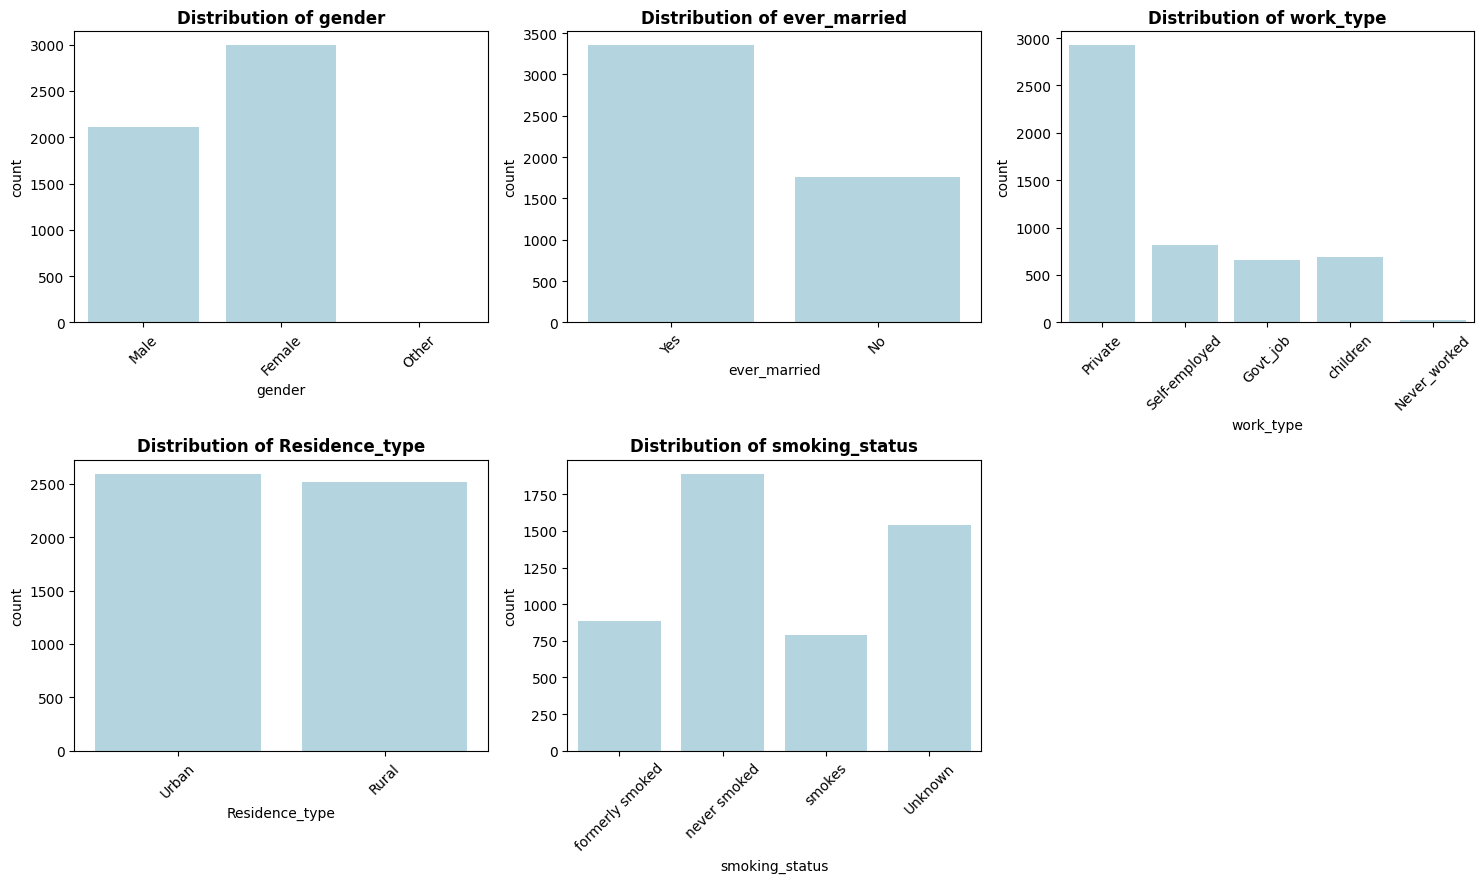

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 12))
# Loop through categorical columns and plot bar charts
for i, col in enumerate(categorical_columns):  # enumerate ..increase auto without counter in loop i+1
    plt.subplot(3,3, i + 1)                    # i+1 to start from 1 not 0
    sns.countplot(data=df, x=col,color="lightblue")
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

## 7️⃣ Missing Values Analysis and Handling

Missing Values per Column: bmi    201
dtype: int64


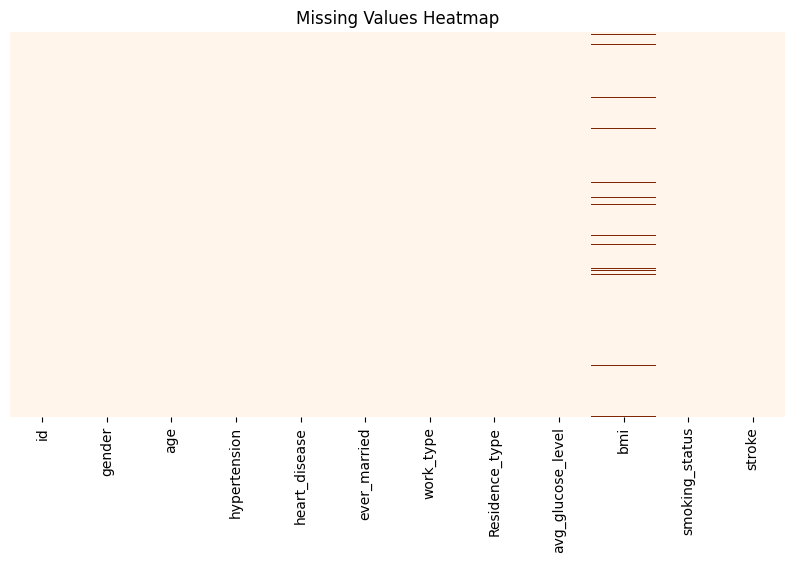

In [11]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Keep only columns with missing values
print(f"Missing Values per Column: {missing_values}")
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="Oranges", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
df.drop('id', axis=1, inplace=True) # Drop irrelevant ID column

In [13]:
print(f"Missing BMI values before treatment:{df['bmi'].isnull().sum()}")
df['bmi'].fillna(df['bmi'].mean(), inplace=True) # Handle missing BMI values with mean instead of median
print(f"Missing BMI values after treatment:{df['bmi'].isnull().sum()}")

Missing BMI values before treatment:201
Missing BMI values after treatment:0


## 8️⃣ Outlier Detection & Treatment

In [14]:
numerical_columns=df.select_dtypes(include=np.number).columns
numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

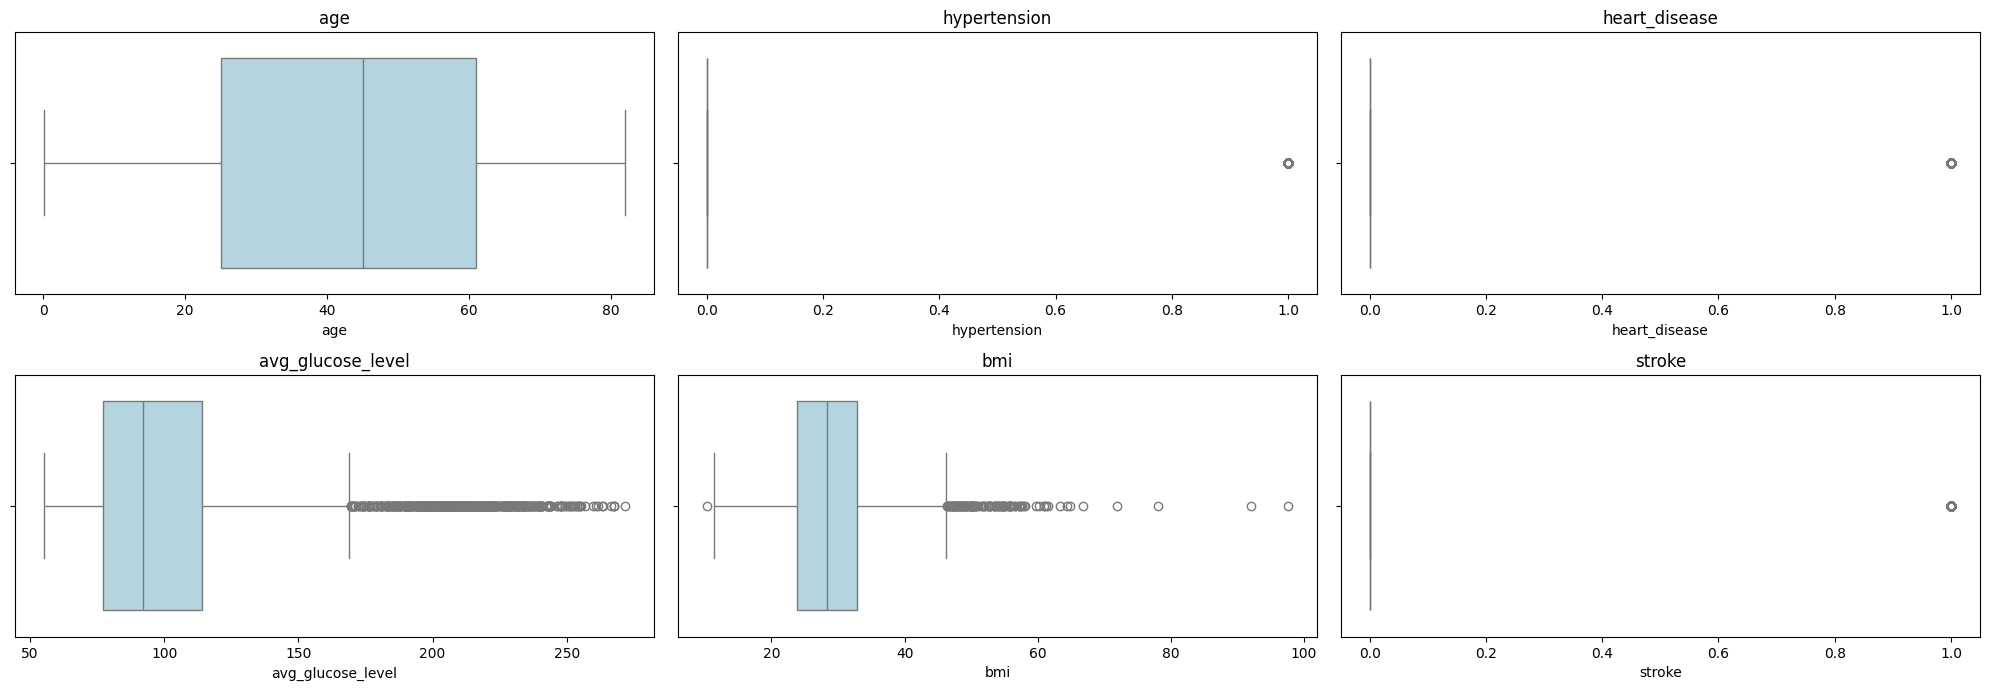

In [15]:
i = 1
plt.figure(figsize=(20, 10))
for column in numerical_columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column], color="lightblue")
    plt.title(column)
    i += 1
plt.tight_layout()
plt.show()

In [16]:
outliers_columns=['avg_glucose_level', 'bmi']

In [17]:
cleaned_df = df.copy()        # Create a copy to keep original data

In [18]:
for column in outliers_columns:
     Q1 = cleaned_df[column].quantile(0.25)
     Q3 = cleaned_df[column].quantile(0.75)
     IQR = Q3 - Q1
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR
     cleaned_df = cleaned_df[
        (cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)
    ]

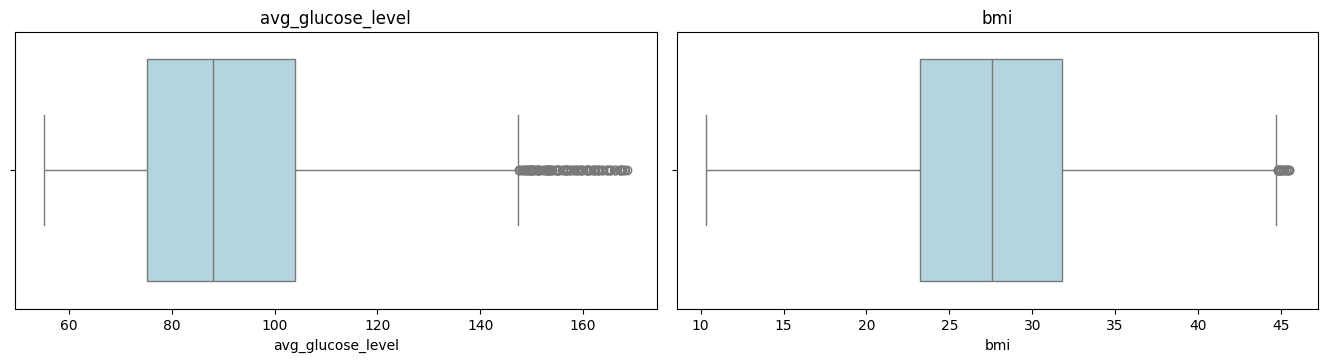

In [19]:
i = 1
plt.figure(figsize=(20, 10))
for column in outliers_columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=cleaned_df[column], color="lightblue")
    plt.title(column)
    i += 1
plt.tight_layout()
plt.show()

In [20]:
print(f"Length of data before deletion: {len(df)}")
print(f"Length of data after deletion: {len(cleaned_df)}")

Length of data before deletion: 5110
Length of data after deletion: 4383


#### Correlation Analysis After Outlier Removal  

In [21]:
correlation_matrix = cleaned_df[outliers_columns].corr()

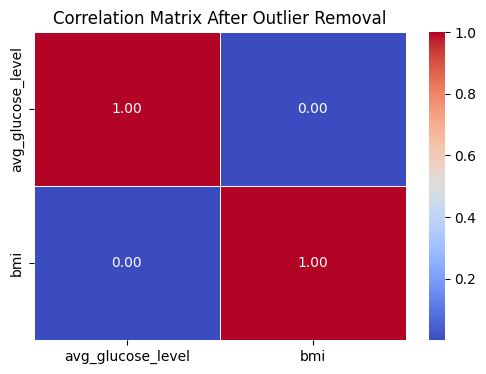

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix After Outlier Removal")
plt.show()

## 9️⃣ Feature Relationships Analysis
Understanding the relationships between variables helps in identifying important patterns. 

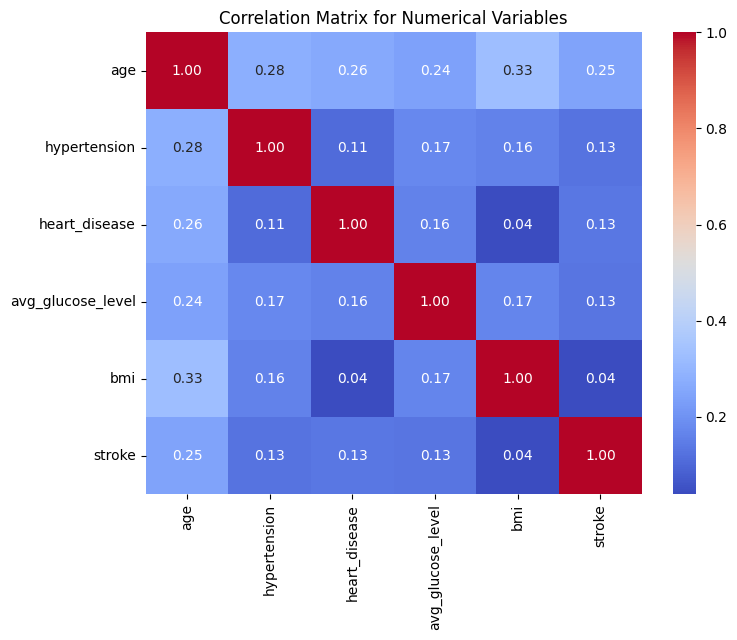

In [23]:
numerical_columns=df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

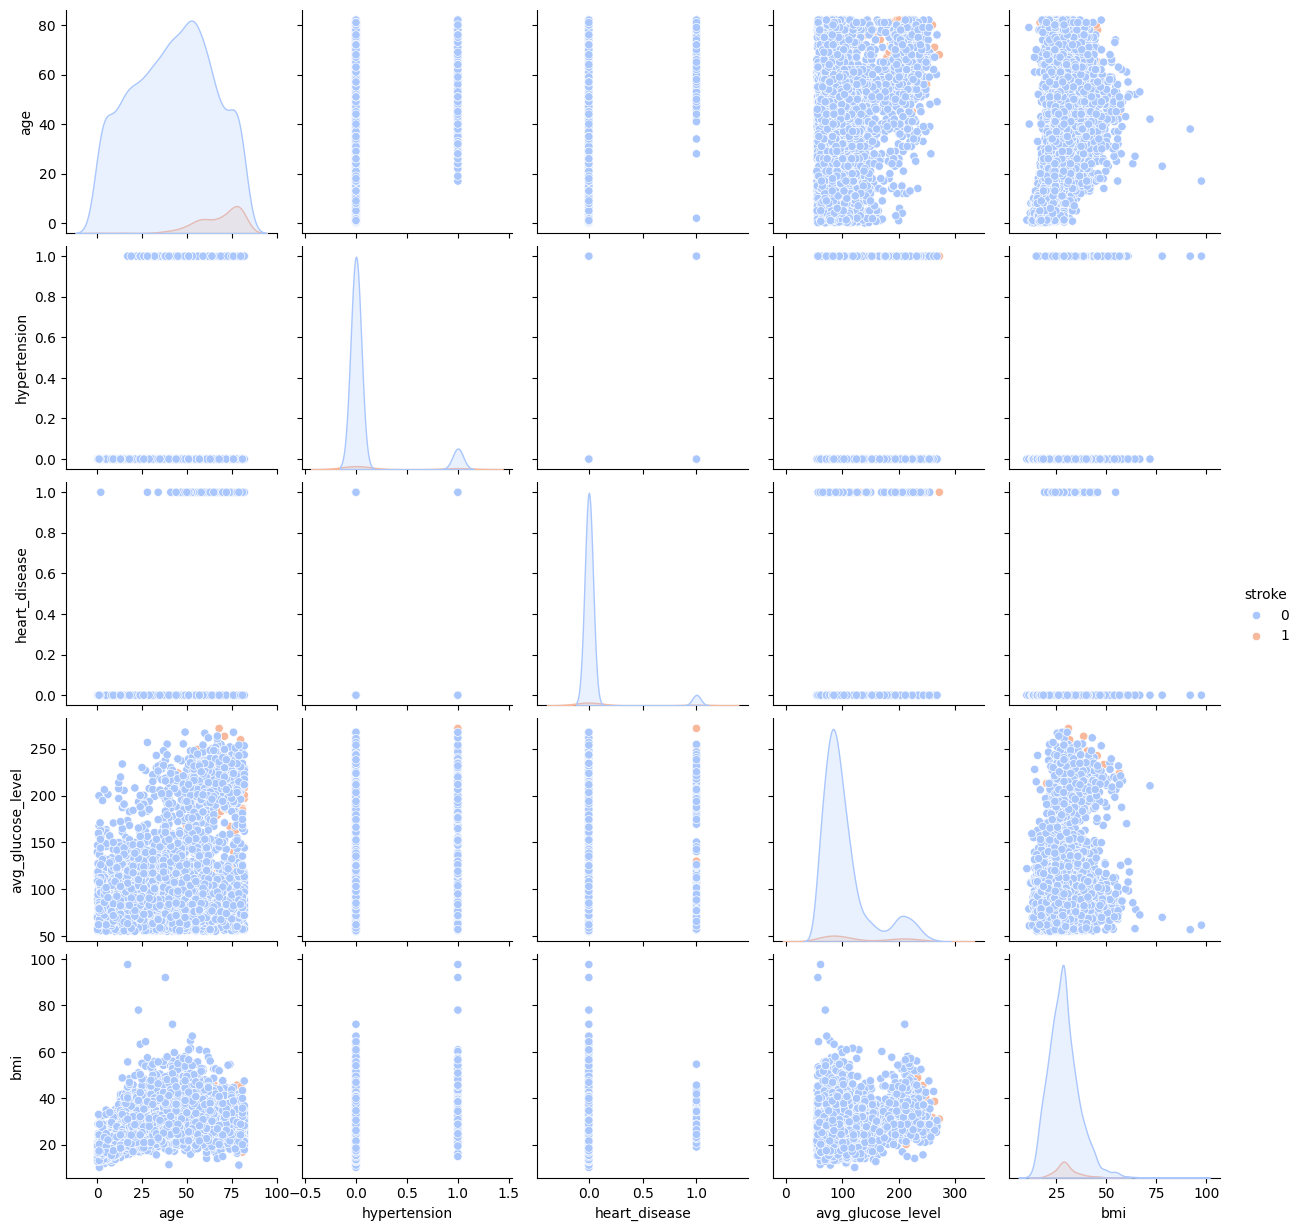

In [24]:
sns.pairplot(df, hue="stroke", diag_kind="kde", palette="coolwarm")
plt.show()

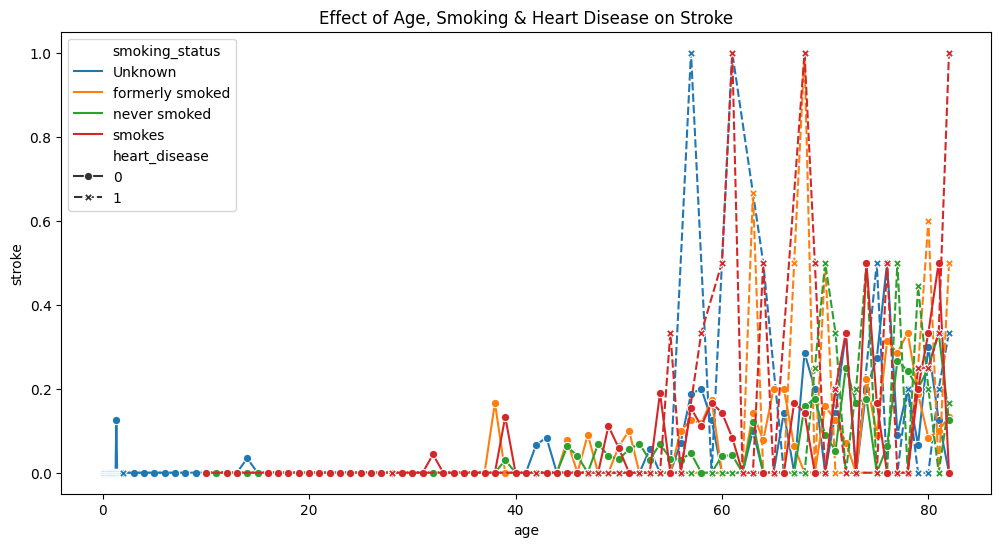

In [25]:
df_grouped = df.groupby(["age", "smoking_status", "heart_disease"])["stroke"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x="age", y="stroke", hue="smoking_status", style="heart_disease", markers=True)
plt.title("Effect of Age, Smoking & Heart Disease on Stroke")
plt.show()

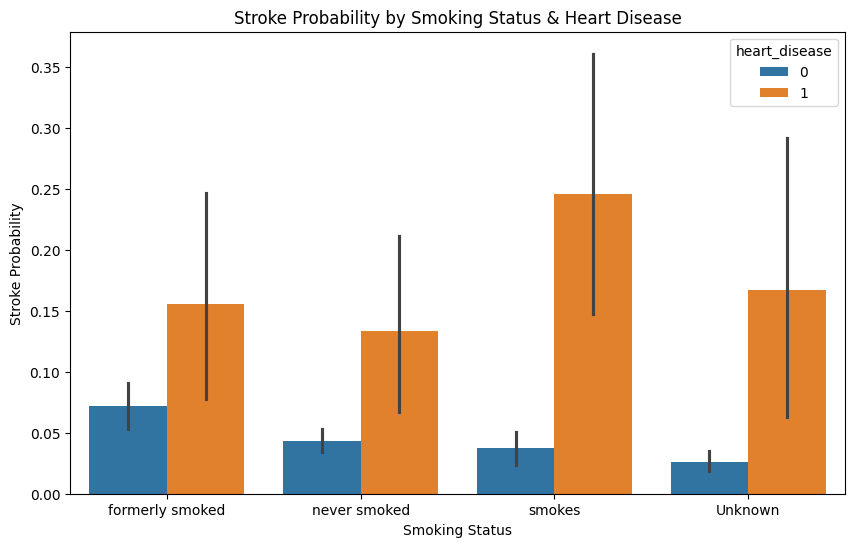

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="smoking_status", y="stroke", hue="heart_disease")
plt.title("Stroke Probability by Smoking Status & Heart Disease")
plt.ylabel("Stroke Probability")
plt.xlabel("Smoking Status")
plt.show()

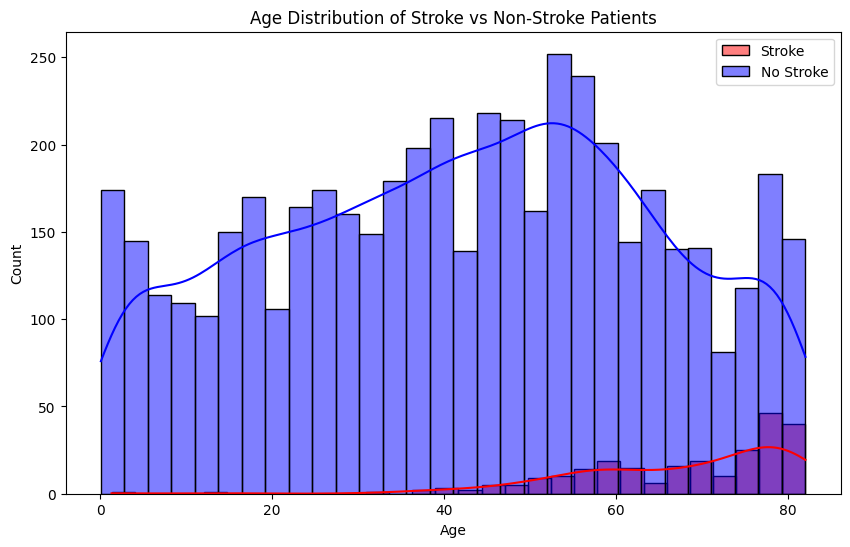

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df["stroke"] == 1]["age"], bins=30, color="red", kde=True, label="Stroke")
sns.histplot(df[df["stroke"] == 0]["age"], bins=30, color="blue", kde=True, label="No Stroke")
plt.title("Age Distribution of Stroke vs Non-Stroke Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

## 1️⃣0️⃣ Data Preparation & Modeling

In [28]:
## Make a copy of the data and convert categorical columns into numeric dummy variables
df = cleaned_df.copy()
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [29]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb

warnings.filterwarnings("ignore")

X = df.drop('stroke', axis=1)
y = df['stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [5, 7],
    'subsample': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Accuracy: 0.9644549763033176
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       838
           1       0.96      0.96      0.96       850

    accuracy                           0.96      1688
   macro avg       0.96      0.96      0.96      1688
weighted avg       0.96      0.96      0.96      1688



## 1️⃣1️⃣ Saving the trained model as a .pkl file

In [30]:
import pickle
filename = 'model.pkl'
pickle.dump(best_xgb_model, open(filename, 'wb'))

In [31]:
load_model = pickle.load(open(filename, 'rb'))

In [32]:
load_model.predict(X_test)

array([0, 0, 1, ..., 1, 1, 0])